<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/Lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L1 regularization technique

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from  sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [15]:
df = pd.read_csv("audi.csv")
df.isnull().sum().sum() # no  null value

x = df.drop("price",axis=1)
y = df["price"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


c = ColumnTransformer(transformers = [
    ("cat" , OneHotEncoder(handle_unknown='ignore' , sparse_output=False , drop='first') , ['model' ,'transmission', 'fuelType']),
    ("num" , StandardScaler() , ['year' , 'mileage' , 'mpg' , 'engineSize', 'tax'])
] ,
                      remainder = "passthrough")


x_train = c.fit_transform(x_train)
x_test = c.transform(x_test)

In [16]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## lasso implementation using the closed form solution

In [18]:

class LassoClosedForm:
    def __init__(self, alpha=1.0, max_iter=1000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.m = None
        self.b = None

    def fit(self, X, y):
        n, d = X.shape
        self.m = np.zeros(d)
        self.b = 0

        for _ in range(self.max_iter):
            for j in range(d):
                X_j = X[:, j]
                residual = y - (np.dot(X, self.m) + self.b) + self.m[j] * X_j
                rho_j = np.dot(X_j, residual)

                if rho_j < -self.alpha:
                    self.m[j] = (rho_j + self.alpha) / np.dot(X_j, X_j)
                elif rho_j > self.alpha:
                    self.m[j] = (rho_j - self.alpha) / np.dot(X_j, X_j)
                else:
                    self.m[j] = 0

            self.b = np.mean(y - np.dot(X, self.m))

    def predict(self, X):
        return np.dot(X, self.m) + self.b

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        return {
            'MSE': mean_squared_error(y, y_pred),
            'R2 Score': r2_score(y, y_pred)}

In [19]:

lasso_closed_form = LassoClosedForm(alpha=0.1)
lasso_closed_form.fit(x_train, y_train)
y_pred_closed_form = lasso_closed_form.predict(x_test)
metrics_closed_form = lasso_closed_form.evaluate(x_test, y_test)
print("Closed-Form Lasso Regression Metrics:", metrics_closed_form)


Closed-Form Lasso Regression Metrics: {'MSE': 15208450.188040303, 'R2 Score': 0.8893254873055525}


## lasso implementation using the gradient descent


In [20]:
class LassoGradientDescent:
    def __init__(self, alpha=1.0, learning_rate=0.01, epochs=1000):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = None
        self.b = None

    def fit(self, X, y):
        n, d = X.shape
        self.m = np.zeros(d)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.m) + self.b
            error = y_pred - y

            gradient_m = (2/n) * np.dot(X.T, error) + self.alpha * np.sign(self.m)
            gradient_b = (2/n) * np.sum(error)

            self.m -= self.learning_rate * gradient_m
            self.b -= self.learning_rate * gradient_b

    def predict(self, X):
        return np.dot(X, self.m) + self.b

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        return {
            'MSE': mean_squared_error(y, y_pred),
            'R2 Score': r2_score(y, y_pred)
        }


In [23]:
lasso_gd = LassoGradientDescent(alpha=0.1, learning_rate=0.1, epochs=10000)
lasso_gd.fit(x_train, y_train)

y_pred_gd = lasso_gd.predict(x_test)

metrics_gd = lasso_gd.evaluate(x_test, y_test)
print("Gradient Descent Lasso Regression Metrics:", metrics_gd)


Gradient Descent Lasso Regression Metrics: {'MSE': 15166647.139076408, 'R2 Score': 0.889629695296243}


## lasso using the sklearn

In [25]:
class SklearnLasso:
    def __init__(self, alpha=1.0):
        self.model = Lasso(alpha=alpha)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        return {
            'MSE': mean_squared_error(y, y_pred),
            'R2 Score': r2_score(y, y_pred)
        }


In [26]:

lasso_sklearn = SklearnLasso(alpha=0.1)
lasso_sklearn.fit(x_train, y_train)

y_pred_sklearn = lasso_sklearn.predict(x_test)

metrics_sklearn = lasso_sklearn.evaluate(x_test, y_test)
print("Sklearn Lasso Regression Metrics:", metrics_sklearn)


Sklearn Lasso Regression Metrics: {'MSE': 15207917.419344299, 'R2 Score': 0.8893293643551584}


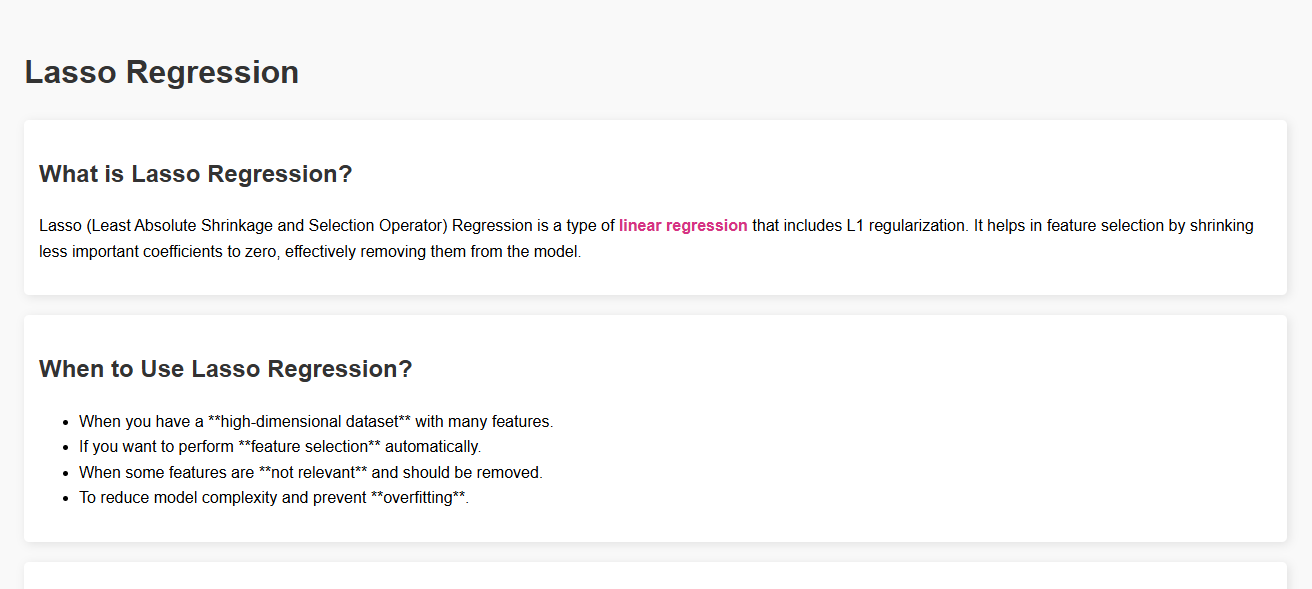

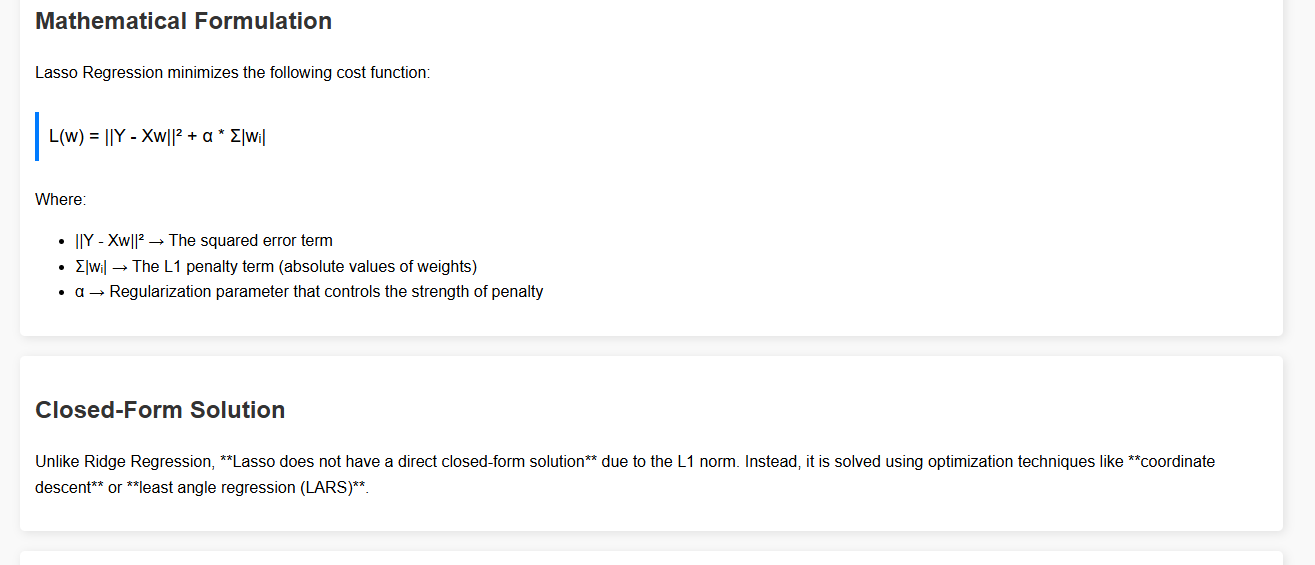

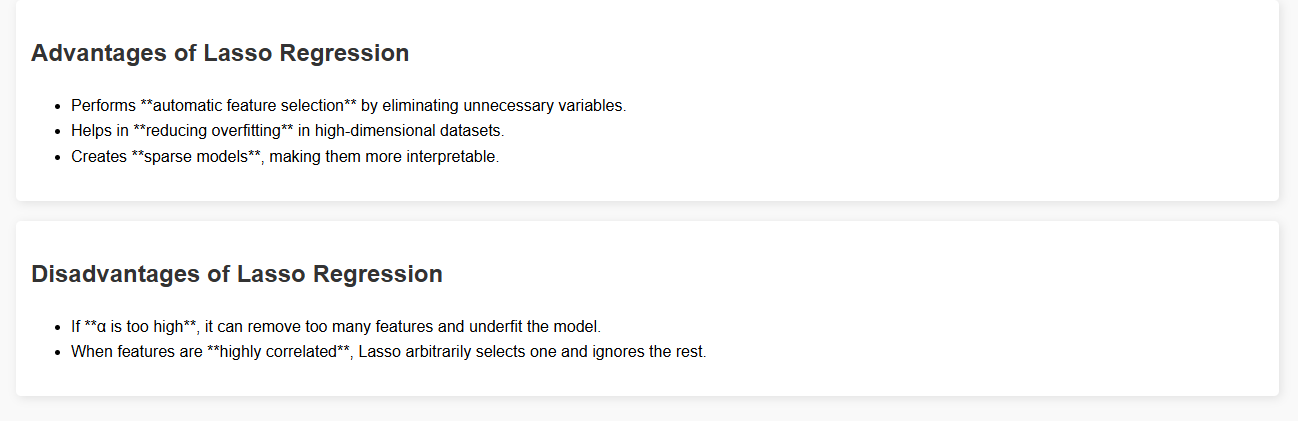